# Linear Regression

This Jupyter Notebook is dedicated to understanding and implementing the linear regression algorithm on a single neuron for soccer data. You can find the dataset [2022-2023 Soccer Player Stats Dataset](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?resource=download).

The following packages are required to run the attached code:

- [Math](https://docs.python.org/3/library/math.html)

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Seaborn](https://seaborn.pydata.org/)

- [Pandas](https://pandas.pydata.org/docs/)

## Description of the Algorithm:

***
Continuing on with supervised machine learning, in this notebook, I will implement a single neuron regression model (simple linear regression for simplicity) using gradient descent. 

While the perceptron algorithm performed binary classification, linear regression will train a function to establish a (linear) functional relationship between a set of predictor variables and a response variable. 

In regression, we take a predictor data, $D = (x_1 , y_1), ... , (x_n , y_n)$, where $x_i$ represents a vector of predictor data and $y_i$ represents the true response. If there is some "true" or "optimal" target function, our goal is to create a model that reflects this function by training it using the given data. 

Our goal is to accurately predict the response variables given the predictor variables, estimating the true target function in the process. 

In this case, we will use linear regression, so we are assuming that the "true" target function is linear -- that there is a linear relationship between the predictors and the response.
***

## Setting Up:

***
Import the necessary modules.
***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

***
Read in the data. We will be using shots as the predictor and goals as the response.
***

In [2]:
#Import the dataset. 
soccer = pd.read_csv("/Users/pstern/Desktop/INDE-577/Datasets/soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

# Filter the data such that we are only including players who have player more than 15 games worth of time.
soccer = soccer[soccer['90s'] >= 15.0]

# Just use the first 250 data points.
data = soccer[:250]

# Selects shots as our predictor.
predictors = data[['Shots']]

# Now do the same for the goals.
y = data[['Goals']]

# Convert each to a numpy array.
y = y.values
x = predictors.values

# Get the number of 90s played.
ninetys = data['90s'].values

# Multiply each row by the number of 90s played to normalize.
for i in range(x.shape[1]):
    if ninetys[i] != 0:
        x[:, i] = x[:, i] * ninetys[i]


***
Let's plot this to check if it is approximately linear. 
***

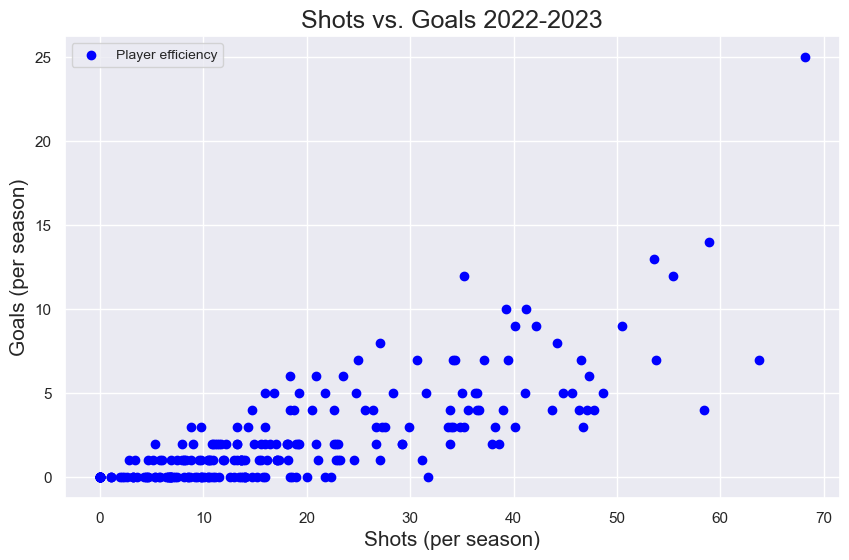

In [3]:
# Set the theme. 
sns.set_theme()

# Plot the data. 
plt.figure(figsize = (10, 6))
plt.scatter(x, y, color = "blue", label = "Player efficiency")
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per season)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

***
Implement the Single Neuron Regression Model.
***

EXPLAIN WHAT THIS IS

In [4]:
# Create a class that implements the model. 
class SingleNeuron(object):
    # Initialize the class object. 
    def __init__(self, activation_function):
            self.activation_function = activation_function

    # Train the model.
    def train(self, x, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + x.shape[1])
        self.errors_ = []
        N = x.shape[0]

        # Loop through the epochs.
        for _ in range(epochs):
            errors = 0
            # Keep track of the errors for each epoch.
            for xi, target in zip(x, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    # Predict the output.
    def predict(self, x):
        preactivation = np.dot(x, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)
    

# Define the activation function.
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(x, y, alpha = 0.0001, epochs = 50)


***
Plot the regression.
***

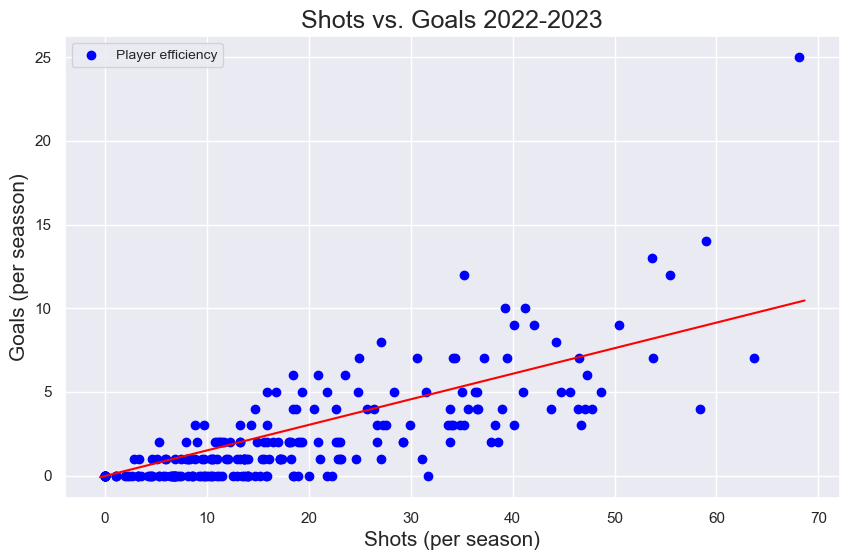

Mean Squared Error:  [2.21139927]


In [5]:
# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(x, y, color = "blue", label = "Player efficiency")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

# Print the mean-squared error.
print("Mean Squared Error: ", node.errors_[-1])

***
Let's look at how the model improves as we increase the epochs.
***

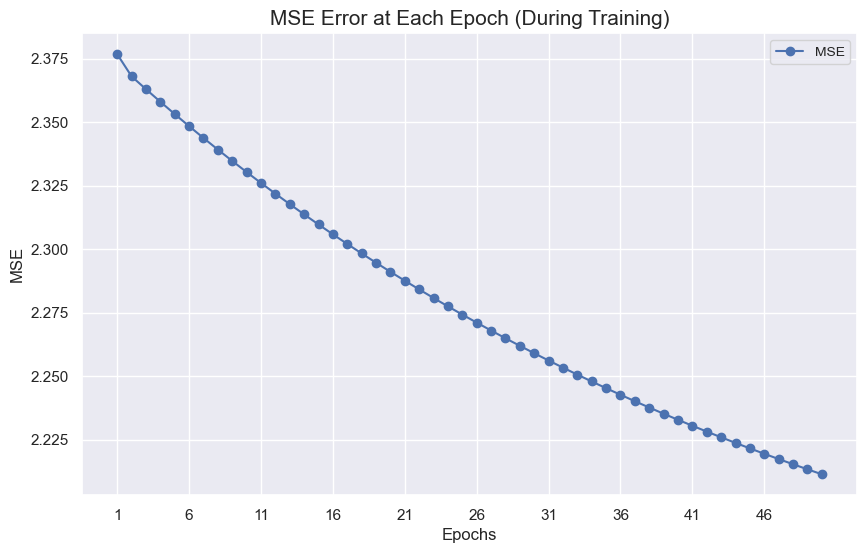

In [6]:
# Plot the data.
plt.figure(figsize = (10, 6))
plt.plot(range(1, len(node.errors_) + 1), node.errors_, marker = "o", label = "MSE")

# Add labels and the legend.
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE Error at Each Epoch (During Training)", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1, 5))
plt.legend(fontsize = 10)
plt.show()

It's interesting how this decreases rapidly after the first epoch and then very slowly after each remaining iteration. 

***
Let's look at the impact of changing the learning rate. 
***

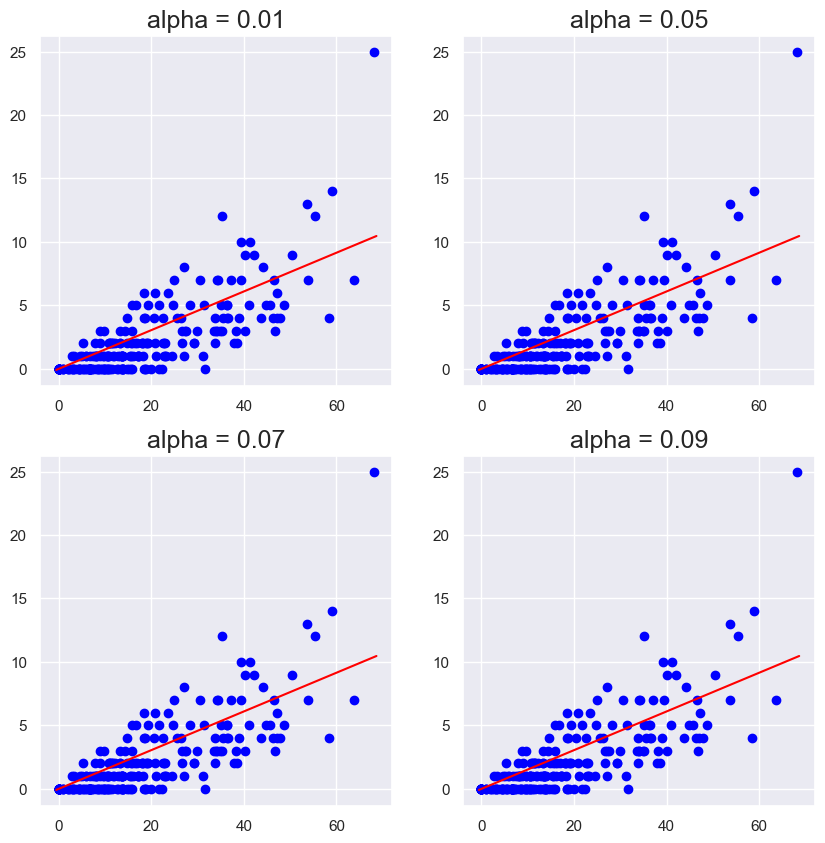

In [7]:
# Choose possible learning rates.
alphas = [0.01, 0.05, 0.07, 0.09]

# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Call the subplots method for plotting a grid of figures.
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    ax.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')
    ax.scatter(x, y, color = "blue")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

## Testing on New Data: Is overfitting an issue?

***
Get the additional data.
***

In [8]:
# Get the test data. 
test_data = soccer[250:500]

# Selects shots as our predictor.
predictors = test_data[['Shots']]

# Now do the same for the goals.
y1 = test_data[['Goals']]

# Convert each to a numpy array.
y1 = y1.values
x1 = predictors.values

# Get the number of 90s played.
ninetys = test_data['90s'].values

# Multiply each row by the number of 90s played to normalize.
for i in range(x.shape[1]):
    if ninetys[i] != 0:
        x1[:, i] = x1[:, i] * ninetys[i]

***
Replot the data and compare the mean-squared errors.
***

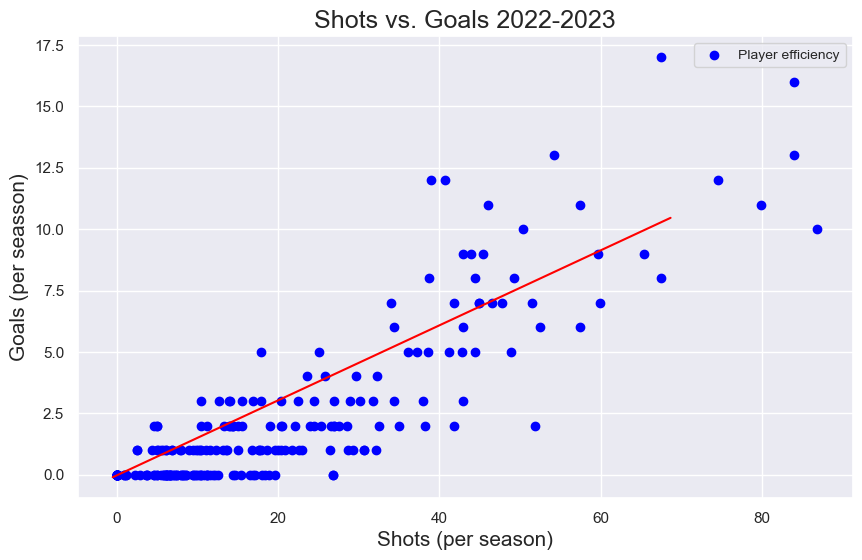

Mean Squared Error:  [2.94383329]


In [9]:
# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(x1, y1, color = "blue", label = "Player efficiency")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

# Calculate the mean-squared error.
mse = 0 
for i in range(len(x1)-1):
    prediction = node.predict(x1[i])
    actual = y1[i]
    mse += (prediction - actual)**2

print("Mean Squared Error: ", mse/len(x1))


As expected, we see the mean-squared error is higher, but it is still pretty low for the data we did not train the data on.

***
Let's try this again, but this time lets train on a fewer and greater number of epochs to see the difference.
***

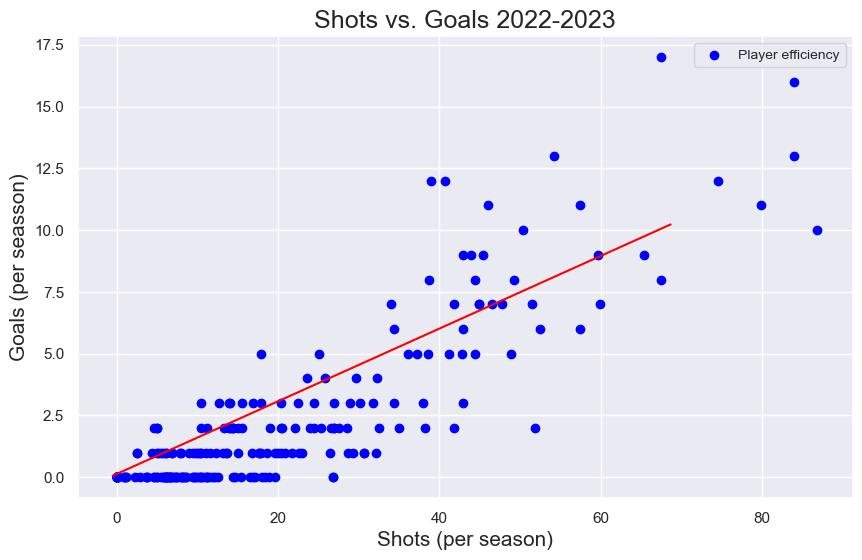

Mean Squared Error:  [3.03232868]


In [10]:
node.train(x, y, alpha = 0.0001, epochs = 5)

# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(x1, y1, color = "blue", label = "Player efficiency")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

# Calculate the mean-squared error.
mse = 0 
for i in range(len(x1)-1):
    prediction = node.predict(x1[i])
    actual = y1[i]
    mse += (prediction - actual)**2

print("Mean Squared Error: ", mse/len(x1))

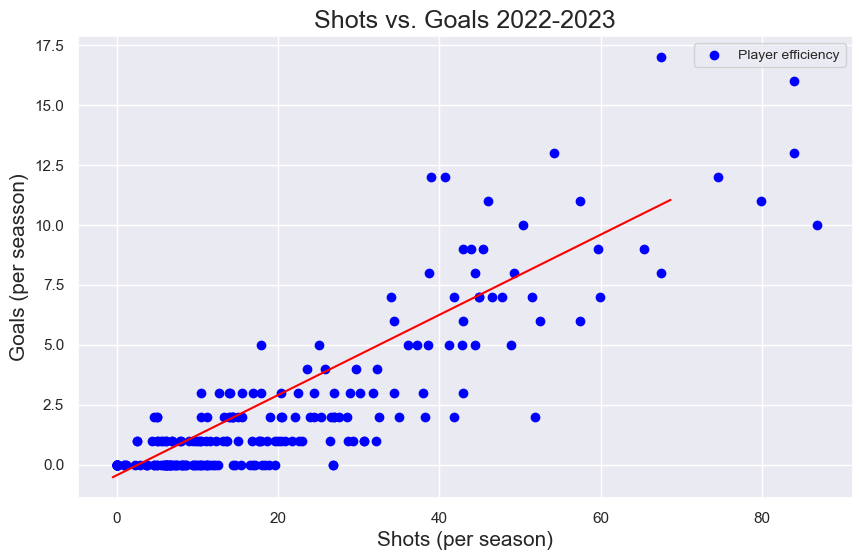

Mean Squared Error:  [2.84926352]


In [11]:
node.train(x, y, alpha = 0.0001, epochs = 200)

# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(x1, y1, color = "blue", label = "Player efficiency")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

# Calculate the mean-squared error.
mse = 0 
for i in range(len(x1)-1):
    prediction = node.predict(x1[i])
    actual = y1[i]
    mse += (prediction - actual)**2

print("Mean Squared Error: ", mse/len(x1))

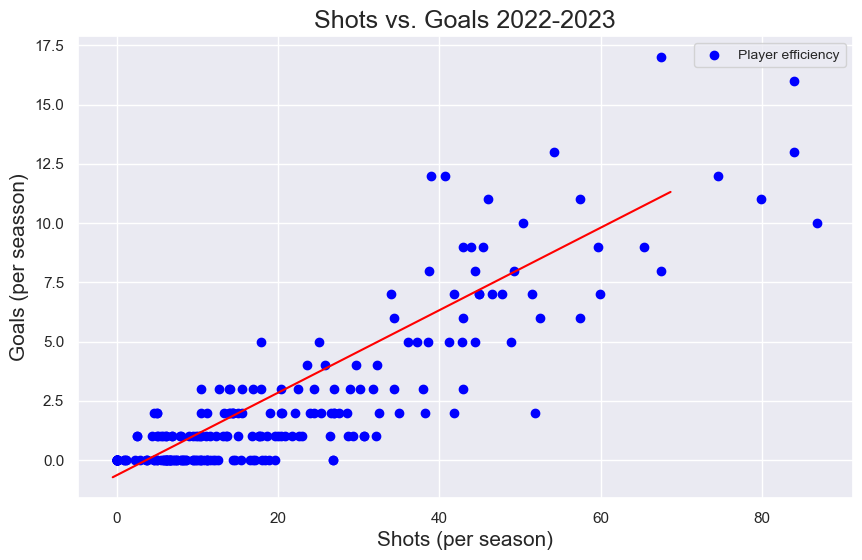

Mean Squared Error:  [2.87027099]


In [12]:
node.train(x, y, alpha = 0.0001, epochs = 1000)

# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(x1, y1, color = "blue", label = "Player efficiency")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

# Calculate the mean-squared error.
mse = 0 
for i in range(len(x1)-1):
    prediction = node.predict(x1[i])
    actual = y1[i]
    mse += (prediction - actual)**2

print("Mean Squared Error: ", mse/len(x1))

This model seems resistent to overfitting. As I increased the number of epochs, the MSE continued to improve (although increasingly more slowly) as the number of epochs grew.

## Conclusions: